In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

In [11]:
# read and process data
arr = []

with open('./0conf.csv') as f:
    for line in f.readlines():
        row = line.split(';')
        arr.append(row)
        
df = pd.DataFrame(arr, columns = ['node1_id','node2_id', 'node1_name', 'node2_name', 'node1_parent_id', 'node2_parent_id', 'node1_parent_name', 'node2_parent_name', 'edge confidence', 'edge weight (med nof)'])
df = df.drop(0)

edgelist = list(zip(df.node1_id, df.node2_id))

In [24]:
def compute_stats(G):
    def plot_CCDF(kis): # plotting function from ps1 
        # input : a list of degrees, e.g., from a networkx graph G
        # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1

        kmax = max(kis)

        # histogram and plot
        counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
        cumcounts = np.cumsum(counts)
        cumcounts = np.insert(cumcounts,0,0)
        plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
        plt.xlabel('Degree, k')
        plt.ylabel('Pr(K>=k)')
        plt.show()
        return

    n = len(nx.nodes(G)) # num nodes 
    m = len(nx.edges(G)) # num edges
    kmean = (2*m)/n # mean degree formula for undirected graph
    C = nx.transitivity(G) # clustering coeffcient 
    #ellmean = nx.average_shortest_path_length(G) # ellmean using networkx function

    print(f'number of nodes, n  = {n}')
    print(f'number of edges, m  = {m}')
    print(f'mean degree,    <k> = %5.2f' % kmean)
    print(f'clustering coefficient, C     = %5.2f' % C)
    #print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
    deg = [x[1] for x in nx.degree(G)] # putting the degree component of nx.degree into an array
    pos=nx.spring_layout(G)
    plt.rcParams["figure.figsize"] = (12,10)
    node_ops = {"node_color": "mediumvioletred", "node_size":100}
    edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
    pos=nx.spring_layout(G)
    
    plot_CCDF(deg)
    nx.draw_networkx_nodes(G, pos, **node_ops)
    nx.draw_networkx_edges(G, pos, **edge_ops)
    return

number of nodes, n  = 1015
number of edges, m  = 37477
mean degree,    <k> = 73.85
clustering coefficient, C     =  0.51


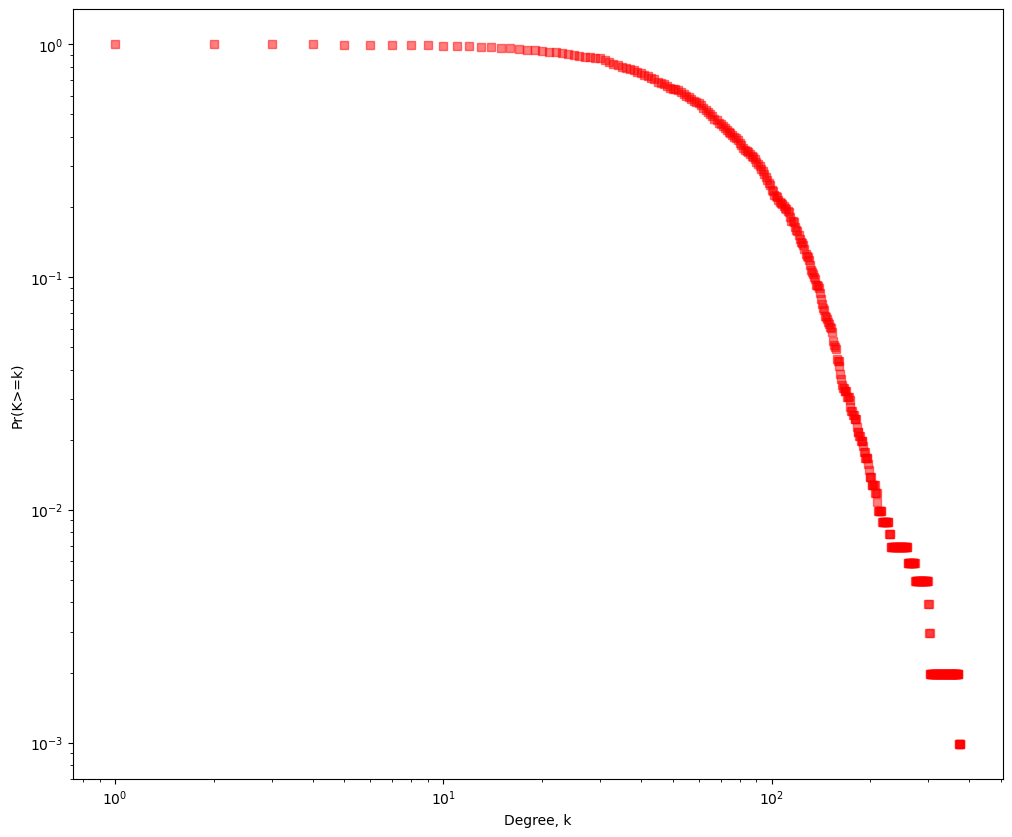

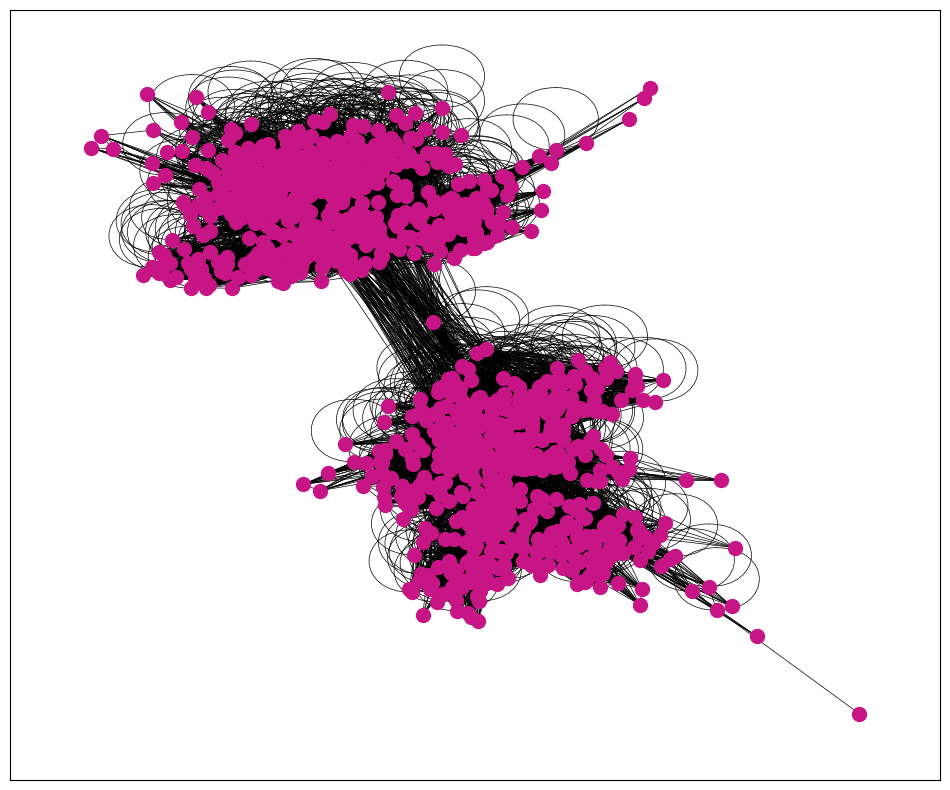

In [25]:
G = nx.from_edgelist(edgelist)

compute_stats(G)

number of nodes, n  = 1015
number of edges, m  = 35062
mean degree,    <k> = 69.09
clustering coefficient, C     =  0.12


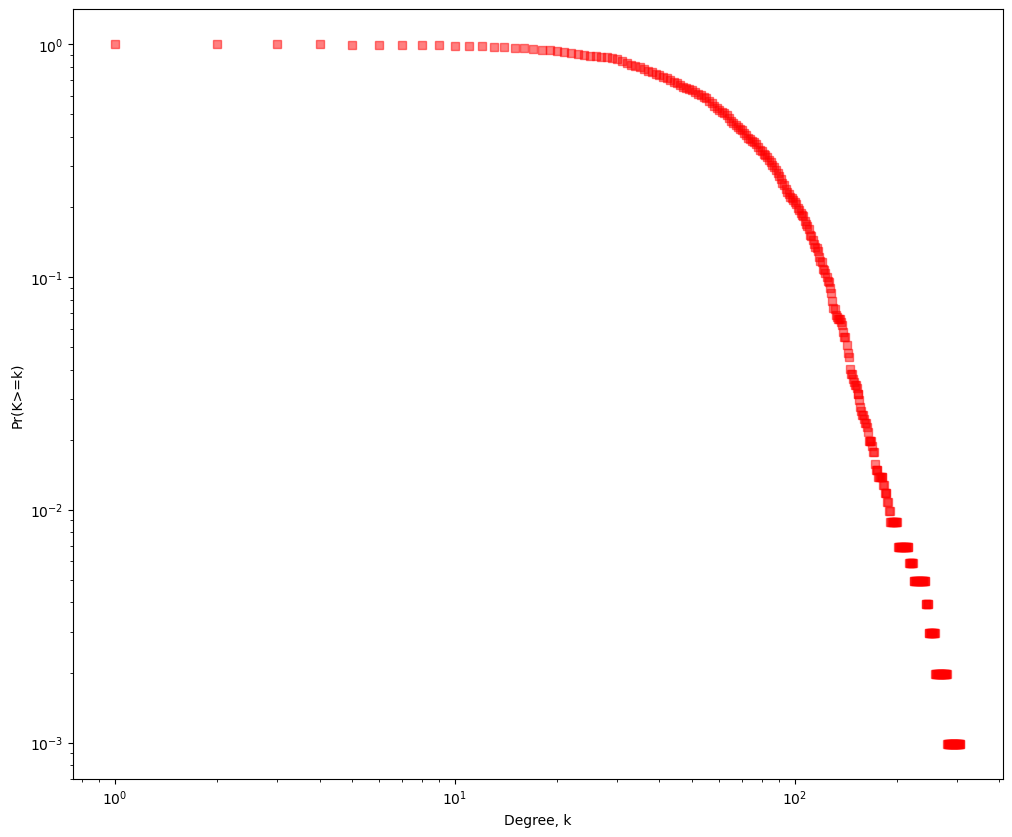

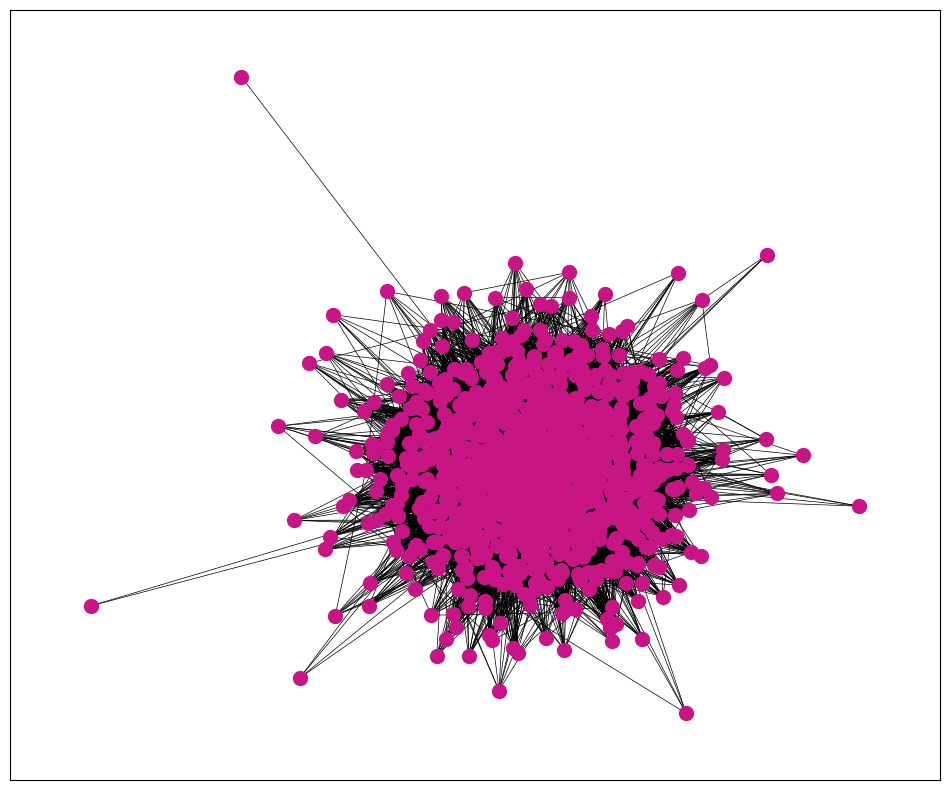

In [26]:
# configuration model stats and spring layout

config = nx.configuration_model([x[1] for x in nx.degree(G)], create_using=nx.Graph)

compute_stats(config)

number of nodes, n  = 1015
number of edges, m  = 37250
mean degree,    <k> = 73.40
clustering coefficient, C     =  0.14


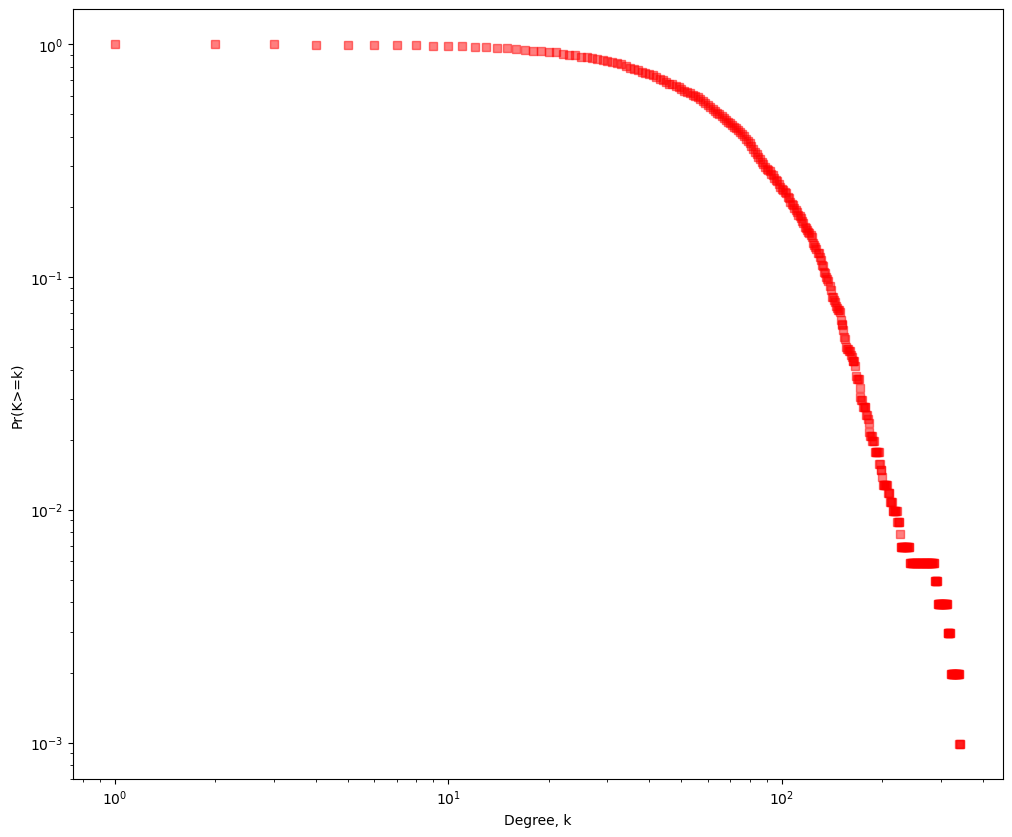

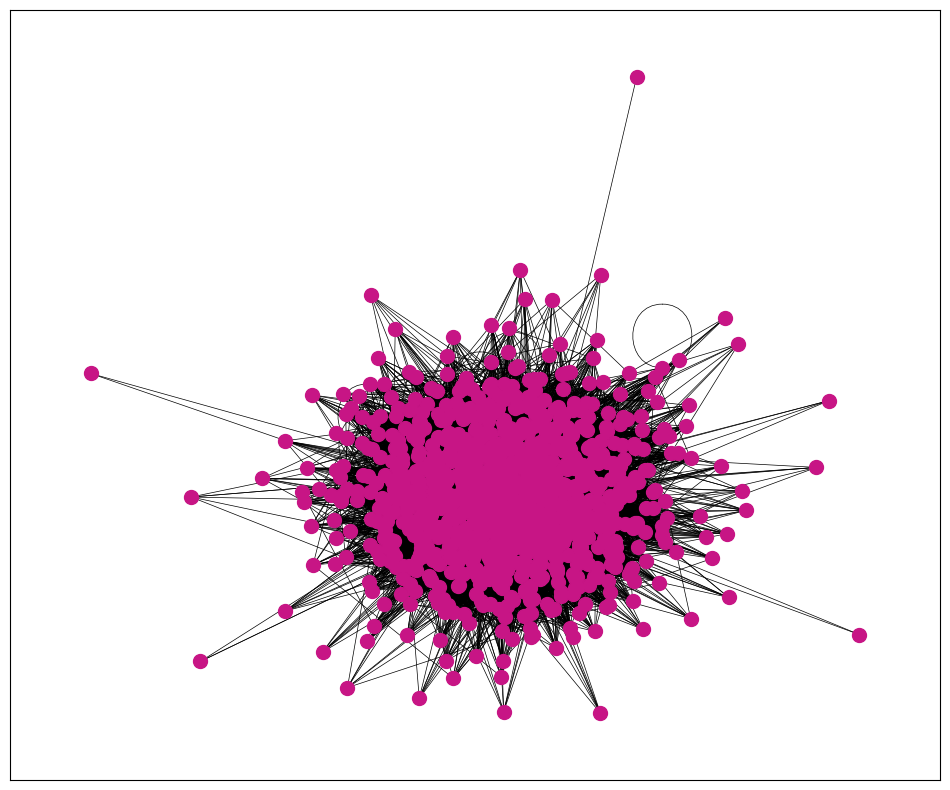

In [28]:
chunglu = nx.expected_degree_graph([x[1] for x in nx.degree(G)])

compute_stats(chunglu)